In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
folder = 'out'
pdims=(4,2)

init_field_slices = []
field_slices = []

for i in range(pdims[0]):
    row_init_field = []
    row_field = []
    
    for j in range(pdims[1]):
        slice_index = i * pdims[1]  + j 
        row_field.append(np.load(f'{folder}/field_{slice_index}.npy'))
        row_init_field.append(np.load(f'{folder}/initial_conditions_{slice_index}.npy'))

    field_slices.append(np.vstack(row_field))
    init_field_slices.append(np.vstack(row_init_field))

field = np.hstack(field_slices)
initial_conditions = np.hstack(init_field_slices)

field.shape

(512, 512, 512)

Text(0.5, 1.0, 'LPT density field at z=0')

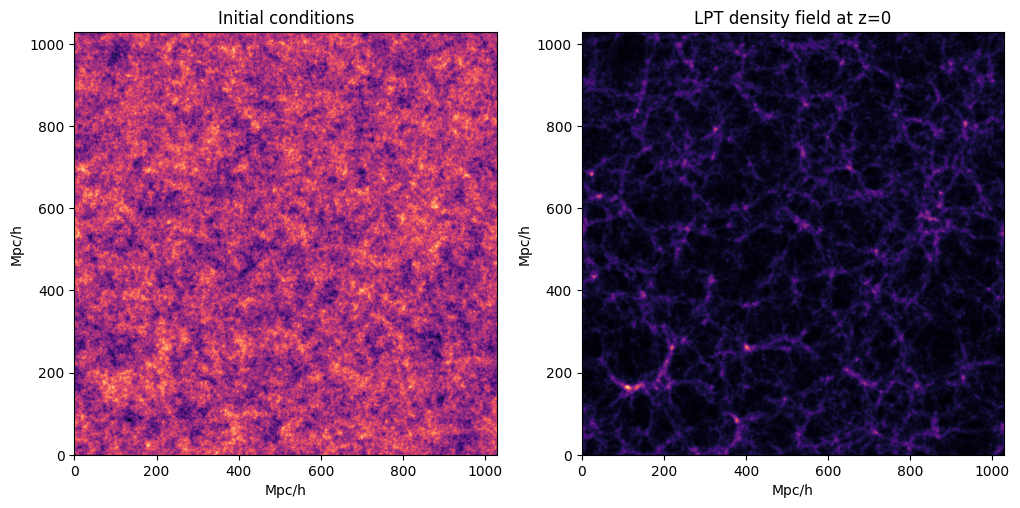

In [33]:
proj_axis = 0
box_size = 1024
sum_over = initial_conditions.shape[0] // 8

slicing = [slice(None)] * initial_conditions.ndim
slicing[proj_axis] = slice(None, sum_over)
slicing = tuple(slicing)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot initial conditions
axes[0].imshow(initial_conditions[slicing].sum(axis=proj_axis), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
axes[0].set_xlabel('Mpc/h')
axes[0].set_ylabel('Mpc/h')
axes[0].set_title('Initial conditions')

# Plot LPT density field at z=0
axes[1].imshow((field[slicing].sum(axis=proj_axis)), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
axes[1].set_xlabel('Mpc/h')
axes[1].set_ylabel('Mpc/h')
axes[1].set_title('LPT density field at z=0')


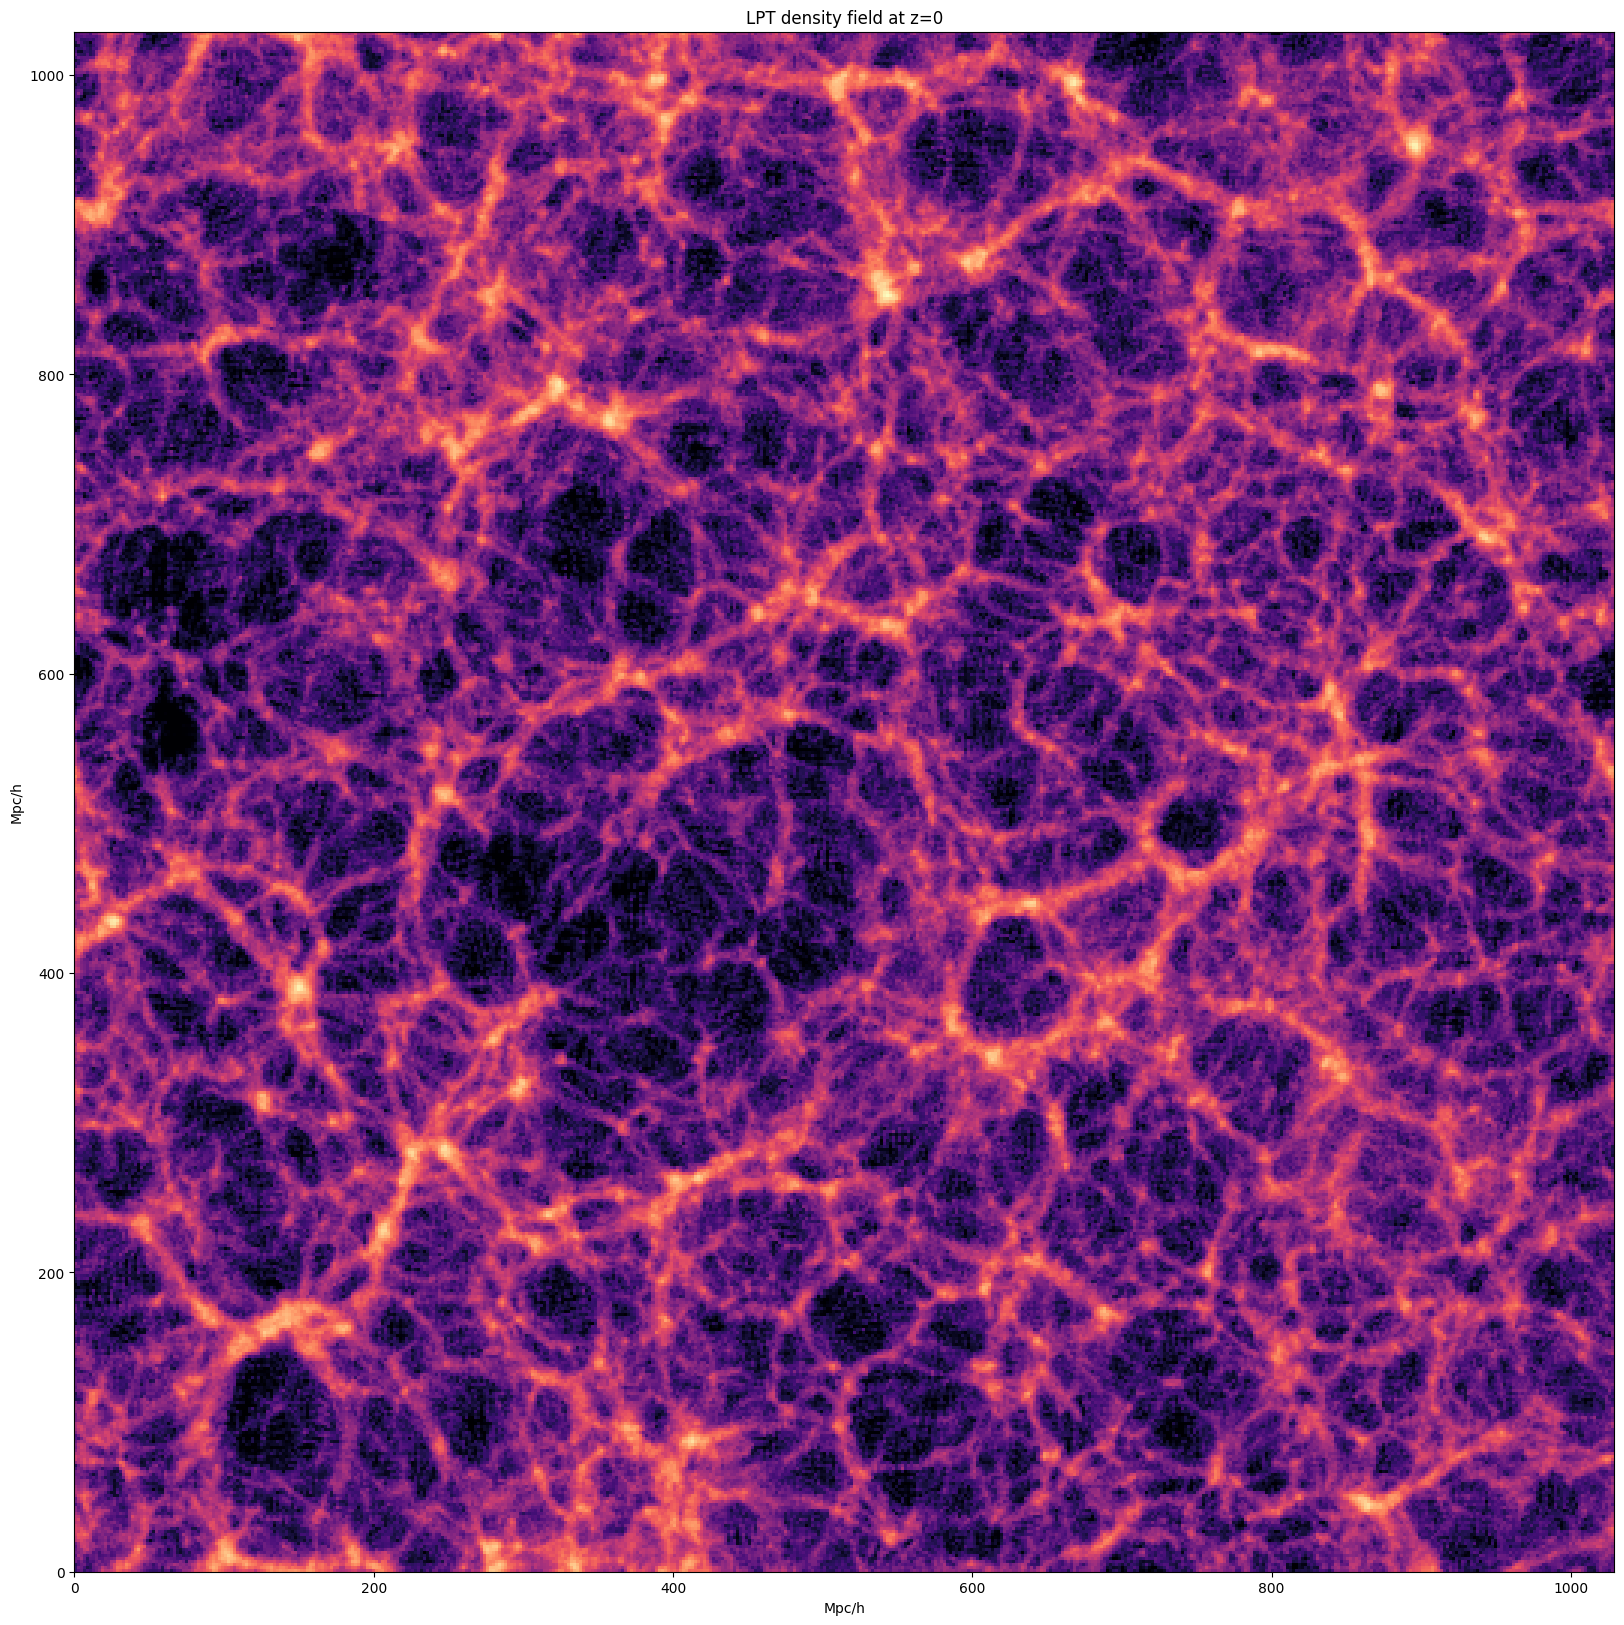

In [36]:
# Projection axis and box size
proj_axis = 0
box_size = 1024 + 5
plt.figure(figsize=(20, 20))
# Generate the plot
plt.imshow(np.log10(field[:16].sum(axis=proj_axis) + 1), cmap='magma', extent=[0, box_size, 0, box_size])
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('LPT density field at z=0')

# Display the plot
plt.show()